In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import statsmodels.formula.api as smf
from scipy.stats import stats

In [37]:
data = pd.read_csv('data/titanic3.csv')
df = data[['age', 'fare']]
df.isnull().sum()

age     263
fare      1
dtype: int64

In [38]:
df.dropna(inplace=True)
df.describe()

,age,fare
count,1045.000000,1045.000000
mean,29.851834,36.686080
std,14.389201,55.732533
min,0.166700,0.000000
25%,21.000000,8.050000
50%,28.000000,15.750000
75%,39.000000,35.500000
max,80.000000,512.329200


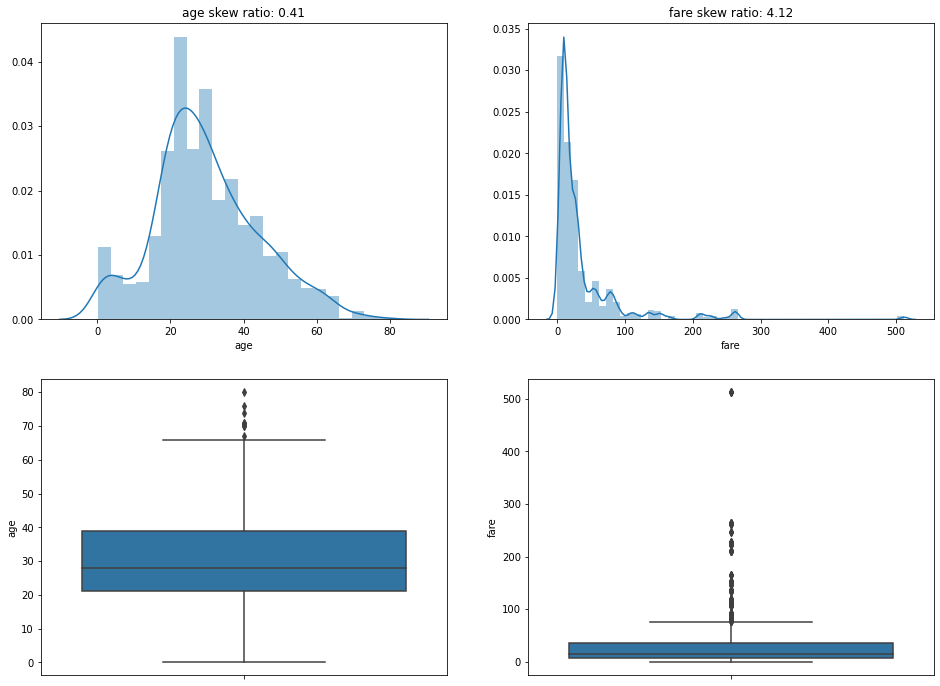

In [39]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sb.distplot(df['age'])
plt.title('age skew ratio: {:.2f}'.format(df['age'].skew()))

plt.subplot(2,2,2)
sb.distplot(df['fare'])
plt.title('fare skew ratio: {:.2f}'.format(df['fare'].skew()))

plt.subplot(2,2,3)
sb.boxplot(y=df['age'])

plt.subplot(2,2,4)
sb.boxplot(y=df['fare'])

plt.show()
# age right skew a little, but fare skew too much
# age and fare also have alot of outliers, upper bounds
# fare have zero value (min=0), so can not use log, try square root

In [51]:
# Try to remove outliers first with IQR, can not use Z-score because not normal distribution
def rm_outlier_iqr(data):
    #find Q1, Q3, and interquartile range for each column
    Q1 = data.quantile(q=.25)
    Q3 = data.quantile(q=.75)
    IQR = data.apply(stats.iqr)

    #only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
    data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]
    return data_clean

df = rm_outlier_iqr(df)
df

,age,fare,age_sqrt,fare_sqrt,age_robust,fare_robust
5,48.0,26.5500,6.928203,5.152669,0.984528,0.379387
7,39.0,0.0000,6.244998,0.000000,0.573558,-1.271615
8,53.0,51.4792,7.280110,7.174901,1.196211,1.027344
12,24.0,69.3000,4.898979,8.324662,-0.236115,1.395747
18,32.0,76.2917,5.656854,8.734512,0.219771,1.527069
...,...,...,...,...,...,...
1301,45.5,7.2250,6.745369,2.687936,0.874547,-0.410355
1304,14.5,14.4542,3.807887,3.801868,-0.892442,-0.053432
1306,26.5,7.2250,5.147815,2.687936,-0.086433,-0.410355
1307,27.0,7.2250,5.196152,2.687936,-0.057356,-0.410355


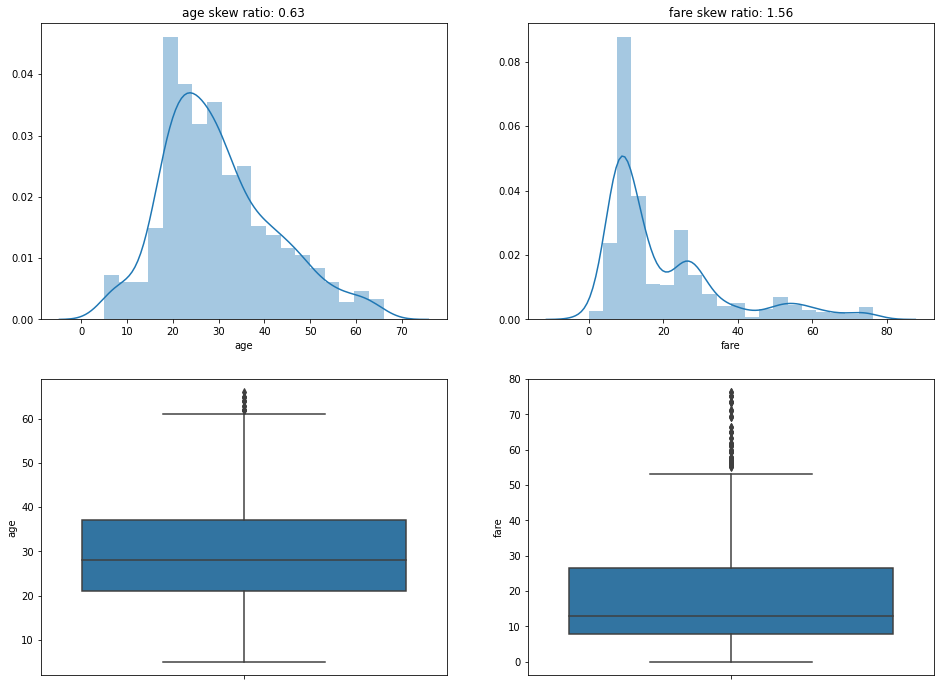

In [52]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sb.distplot(df['age'])
plt.title('age skew ratio: {:.2f}'.format(df['age'].skew()))

plt.subplot(2,2,2)
sb.distplot(df['fare'])
plt.title('fare skew ratio: {:.2f}'.format(df['fare'].skew()))

plt.subplot(2,2,3)
sb.boxplot(y=df['age'])

plt.subplot(2,2,4)
sb.boxplot(y=df['fare'])

plt.show()
# After remove outlier, distribution seem better

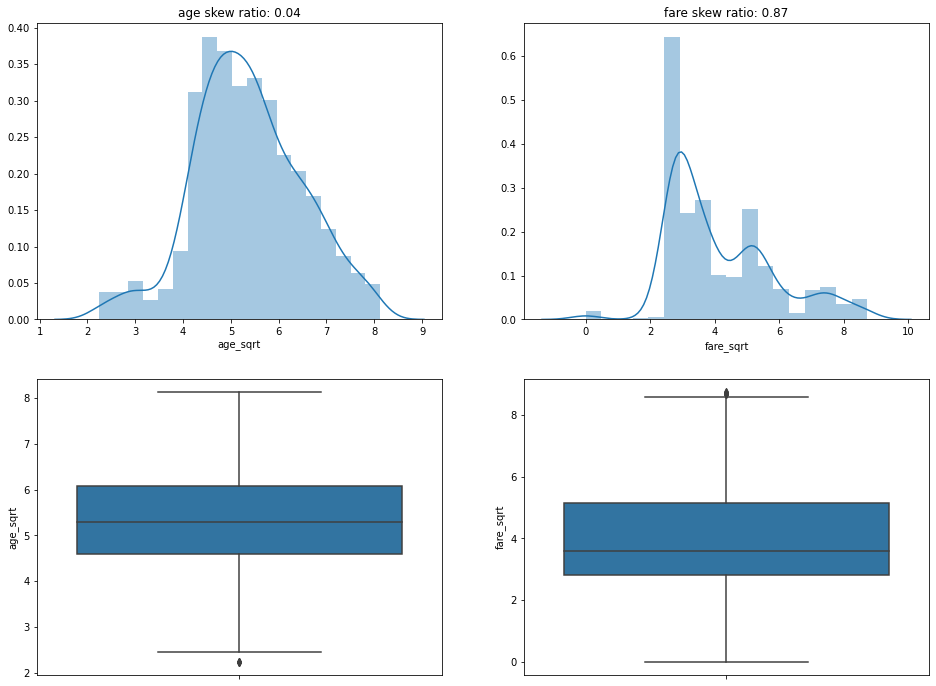

In [54]:
df['age_sqrt'] = np.sqrt(df['age'])
df['fare_sqrt'] = np.sqrt(df['fare'])

plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sb.distplot(df['age_sqrt'])
plt.title('age skew ratio: {:.2f}'.format(df['age_sqrt'].skew()))

plt.subplot(2,2,2)
sb.distplot(df['fare_sqrt'])
plt.title('fare skew ratio: {:.2f}'.format(df['fare_sqrt'].skew()))

plt.subplot(2,2,3)
sb.boxplot(y=df['age_sqrt'])

plt.subplot(2,2,4)
sb.boxplot(y=df['fare_sqrt'])

plt.show()
# Decrease large data but still be right skewness and outliers.
# In this situation, only thing can try more is RobustScaler

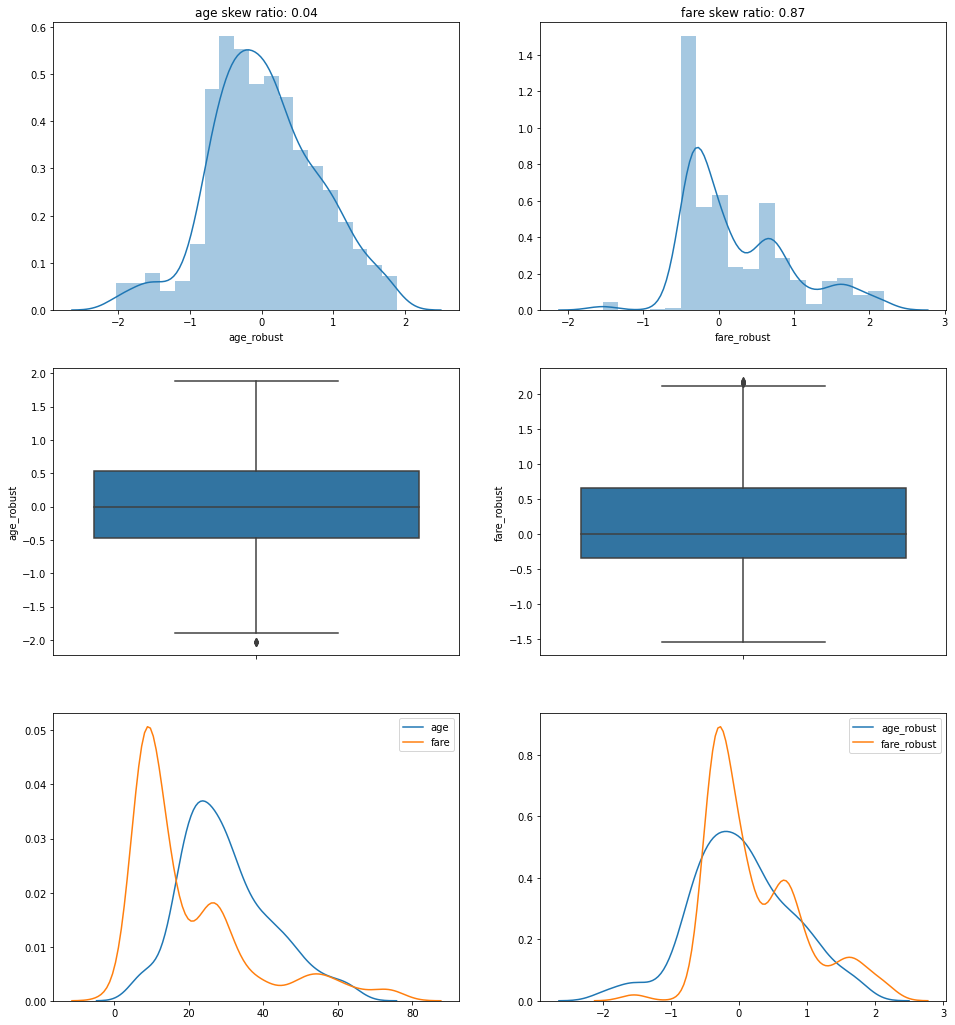

In [56]:
df[['age_robust', 'fare_robust']] = RobustScaler().fit_transform(df[['age_sqrt', 'fare_sqrt']])

plt.figure(figsize=(16,18))

plt.subplot(3,2,1)
sb.distplot(df['age_robust'])
plt.title('age skew ratio: {:.2f}'.format(df['age_robust'].skew()))

plt.subplot(3,2,2)
sb.distplot(df['fare_robust'])
plt.title('fare skew ratio: {:.2f}'.format(df['fare_robust'].skew()))

plt.subplot(3,2,3)
sb.boxplot(y=df['age_robust'])

plt.subplot(3,2,4)
sb.boxplot(y=df['fare_robust'])

plt.subplot(3,2,5)
sb.kdeplot(df['age'])
sb.kdeplot(df['fare'])

plt.subplot(3,2,6)
sb.kdeplot(df['age_robust'])
sb.kdeplot(df['fare_robust'])

plt.show()
# It Seem good